In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns

In [6]:
data = sm.datasets.fair.load_pandas().data
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


<b>Description of Variables</b>

The dataset contains 6366 observations of 9 variables:
     
   rate_marriage: woman's rating of her marriage (1 = very poor, 5 =
   very good)<br>
   age: woman's age<br>
   yrs_married: number of years married<br>
  children: number of children<br>
  religious: woman's rating of how religious she is (1 = not religious, 4 =strongly religious)<br>
   educ: level of education (9 = grade school, 12 = high school, 14 =
  some college, 16 = college graduate, 17 = some graduate school, 20
  = advanced degree)<br>

occupation: woman's occupation (1 = student, 2 = farming/semi-
skilled/unskilled, 3 = "white collar", 4 =     teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
professional with advanced degree)<br>
occupation_husb: husband's occupation (same coding as above)<br>
affairs: time spent in extra-marital affairs


In [7]:
df = data.copy()

In [8]:
df['affair'] = (df.affairs>0).astype(int)

In [10]:
df.drop(columns = ['affairs'],inplace=True)

In [11]:
df = pd.get_dummies(columns = ['occupation','occupation_husb'],data=df)

In [12]:
df

,rate_marriage,age,yrs_married,children,religious,educ,affair,occupation_1.0,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_husb_1.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,0,0,0,0,1,0,0,0,0,1,0,0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,0,0,0,0,0,1,0,0,0,0,0,1,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,0,0,0,1,0,0,0,1,0,0,0,0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,0,0,0,1,0,0,0,0,0,0,1,0,0


<b>data visualization</b>

C:\Users\Panda\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='rate_marriage', ylabel='count'>

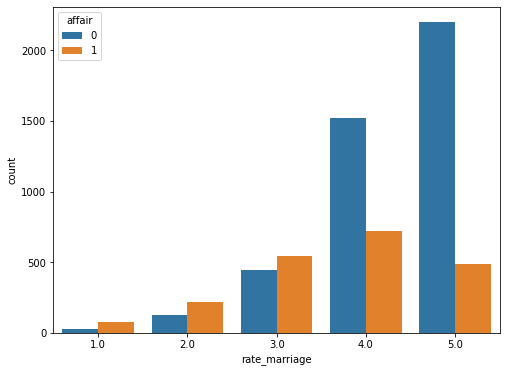

In [13]:
plt.figure(figsize=(8,6))
sns.countplot('rate_marriage',hue = 'affair',data = df)

here,its obvious if rate of marraige is high chances of affair is low and vice - versa

C:\Users\Panda\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='yrs_married', ylabel='count'>

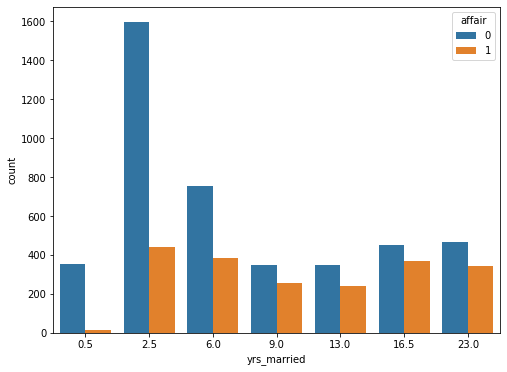

In [14]:
plt.figure(figsize=(8,6))
sns.countplot('yrs_married',hue = 'affair',data = df)

here we can see that as the year of marraige is increasing the affair rate is also increaing

C:\Users\Panda\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='educ', ylabel='count'>

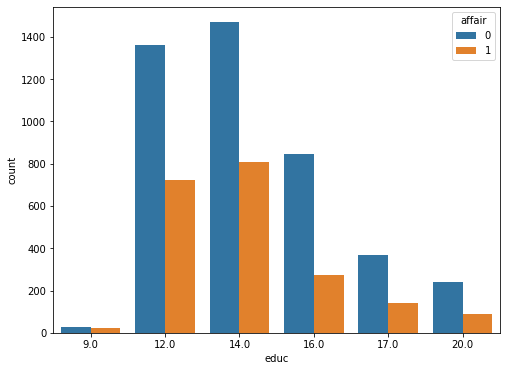

In [15]:
plt.figure(figsize=(8,6))
sns.countplot('educ',hue = 'affair',data = df)

as the education rate increases the affairs are decreasing

C:\Users\Panda\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='religious', ylabel='count'>

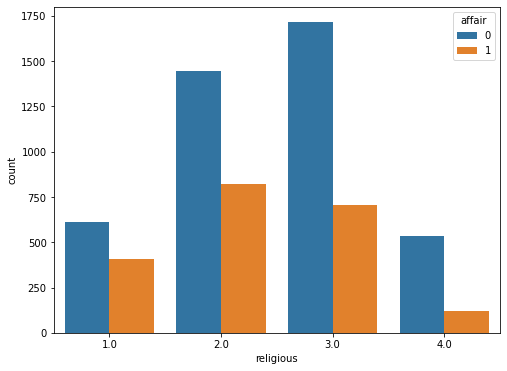

In [16]:
plt.figure(figsize=(8,6))
sns.countplot('religious',hue = 'affair',data = df)

the more religious the woman is the less is chances of having extramarital affair

Text(0.5, 0, 'occupation')

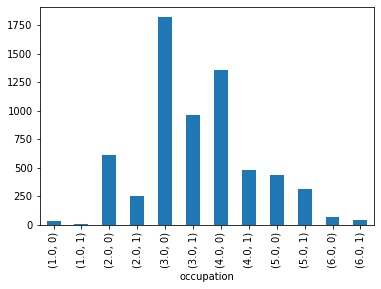

In [22]:
data['affair'] = (data.affairs>0).astype(int)
data.groupby(['occupation','affair']).size().plot(kind = 'bar')
plt.xlabel('occupation')

here the affairs are plotted against job type i.e. extramarital affair rate w.r.t. job type

C:\Users\Panda\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='children', ylabel='count'>

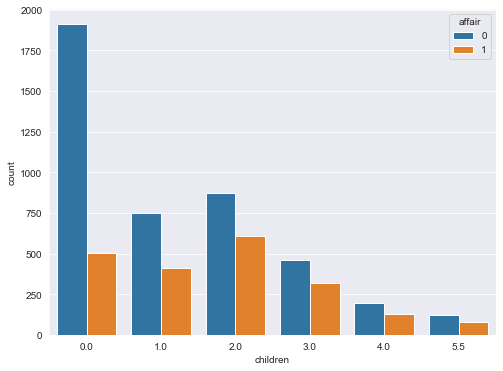

In [702]:
plt.figure(figsize=(8,6))
sns.countplot('children',hue = 'affair',data = df)

<b>Modelling</b>


In [23]:
y,X = df['affair'],df.drop(columns = ['affair'])

check for null values

In [24]:
new = pd.concat([X,y],axis=1)
new.isnull().values.any()


False

check whether dataset is balanced or not

In [25]:
df[df['affair']==0].shape

(4313, 19)

In [26]:
df[df['affair']==1].shape

(2053, 19)

C:\Users\Panda\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


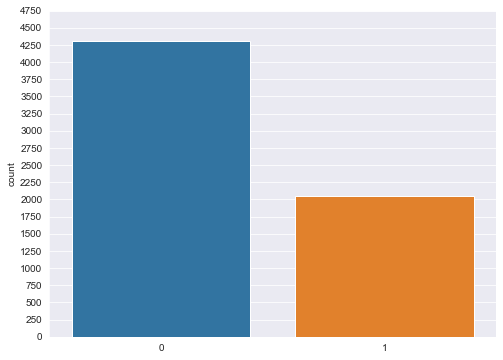

In [27]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.countplot(np.ravel(y))
plt.yticks(range(0,5000,250))
plt.show()

the dataset is imbalanced so we'll use randomoversampler

In [28]:
rdm = RandomOverSampler()
X,y = rdm.fit_resample(X,y)

In [29]:
df = pd.concat([X,y],axis=1) #balanced dataset updataion

In [30]:
df[df['affair']==0].shape

(4313, 19)

In [31]:
df[df['affair']==1].shape

(4313, 19)

C:\Users\Panda\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


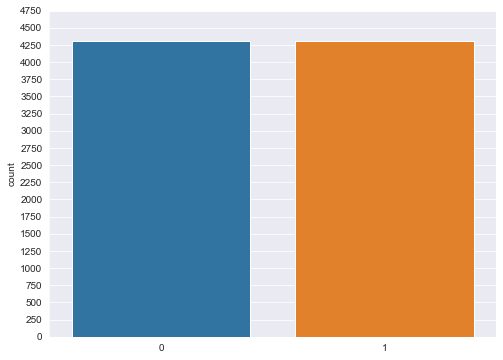

In [32]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')

sns.countplot(np.ravel(y))
plt.yticks(range(0,5000,250))
plt.show()

now it is balanced

<b> Modelling </b>

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 300)

In [34]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

C:\Users\Panda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [35]:
y_pred_on_training = clf.predict(x_train)
y_pred_on_training

array([0, 0, 1, ..., 1, 1, 1])

In [36]:
print('------------accuracy score on training set-------------')
print(accuracy_score(y_train,y_pred_on_training))

------------accuracy score on training set-------------
0.6866666666666666


In [37]:
y_pred_test = clf.predict(x_test)

In [38]:
print('------------accuracy score on test set-------------')
print(accuracy_score(y_test,y_pred_test)) #this is a good accuracy as if we calculate y.mean() before balancing data it is equal to 32.40 i.e. only 32%ladies had affairs

------------accuracy score on test set-------------
0.6888760139049827


In [39]:
#generating probabilities
prob = clf.predict_proba(x_test)

In [40]:
prob

array([[0.52949373, 0.47050627],
       [0.36880056, 0.63119944],
       [0.71338356, 0.28661644],
       ...,
       [0.18896845, 0.81103155],
       [0.51089604, 0.48910396],
       [0.87812524, 0.12187476]])

In [41]:
y_pred_test

array([0, 1, 0, ..., 1, 0, 0])

In [42]:
roc_auc_score(y_test,prob[:,1])

0.7460191499732126

In [43]:
auc = roc_auc_score(y_test,y_pred_test)

In [44]:
auc

0.6887216298558045

<b>Confusion Matrix </b>

In [45]:
conf_mat = confusion_matrix(y_test,y_pred_test)

In [46]:
conf_mat

array([[626, 241],
       [296, 563]], dtype=int64)

In [47]:
fpr,tpr,thresh = roc_curve(y_test,prob[:,1])

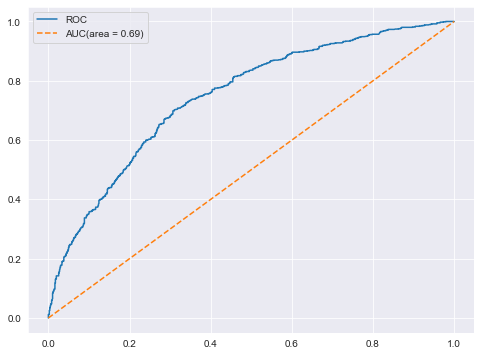

In [48]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label = 'ROC')
plt.plot([0,1],linestyle = '--',label = 'AUC(area = %0.2f)'%auc)
plt.legend()

In [50]:
report  = pd.DataFrame(classification_report(y_test,y_pred_test,output_dict=True))
report

,0,1,accuracy,macro avg,weighted avg
precision,0.678959,0.700249,0.688876,0.689604,0.689554
recall,0.722030,0.655413,0.688876,0.688722,0.688876
f1-score,0.699832,0.677090,0.688876,0.688461,0.688514
support,867.000000,859.000000,0.688876,1726.000000,1726.000000


In [51]:
zippi = list(zip(np.transpose(clf.coef_),X.columns))

In [52]:
dframe = pd.DataFrame(zippi)

In [53]:
dframe

,0,1
0,[-0.7305194451516186],rate_marriage
1,[-0.051501043780215416],age
2,[0.1024986521269621],yrs_married
3,[0.021248326081104094],children
4,[-0.4030746108406442],religious
5,[0.0037344903887773107],educ
6,[-0.18429386503589498],occupation_1.0
7,[0.3621304484716104],occupation_2.0
8,[0.5665988961766563],occupation_3.0
9,[0.3468481743183447],occupation_4.0


In [54]:
#Final Testing of Model :

clf.predict_proba([[4. , 32. , 16.5,  3. ,  4. , 12. ,  0. ,  1. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0.]])

C:\Users\Panda\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[0.52949373, 0.47050627]])

In [55]:
clf.predict([[4. , 32. , 16.5,  3. ,  4. , 12. ,  0. ,  1. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0.]])

C:\Users\Panda\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])